## 5. Improving a model

First predictions - baseline predictions ,
First model - baseline model

From data perspective,

* Could we collect more data?(generally the more data the better the performance)
* Could we improve the data?

From a model perspective,

* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters Vs. Parameters

* Parameters = model find these patterns in data
* Hyperparameters = settings on a model you can adjsut to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters,
* 1. By hand
* 2. Radomly with RandomSearchCV
* 3. Exhaustively with GridSearchCV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
heart_df = pd.read_csv("heart-disease.csv")
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
X = heart_df.drop("target",axis=1)
y = heart_df["target"]

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.2)


clf = RandomForestClassifier()

In [5]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 1. Tuning hyperparameters by hand  - VALIDATION SPLIT (Hyperparameters get tuned on these)

Let's make 3 sets training,validation and testing

In [6]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We are going to try and adjust

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estiamtors`

In [26]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

def evaluate_preds(y_true,y_pred):
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    
    dict_eval = { "accuracy": round(accuracy,2),
                  "precision": round(precision,2),
                  "recall" : round(recall,2),
                  "f1": round(f1,2)}
    
    print(f"Accu : {accuracy*100:.2f}%")
    print(f"Precision : {precision:.2f}")
    print(f"Recall : {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return dict_eval
          

In [21]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the original dataframe
heart_disease_shuffle = heart_df.sample(frac=1)

# Split X and y

X = heart_disease_shuffle.drop("target",axis=1)
y = heart_disease_shuffle["target"]

# Split it into 70% train, 15% validate, 15% test data

train_split  = round(0.7*len(heart_disease_shuffle))
validate_split = train_split+round(0.15*len(heart_disease_shuffle))
test_split = validate_split+round(0.15*len(heart_disease_shuffle))

# Creating Heart disease datasets for train,validation,test
X_train,y_train = X[:train_split],y[:train_split]
X_validate,y_validate = X[train_split:validate_split],y[train_split:validate_split]
X_test,y_test = X[validate_split:],y[validate_split:]

# # Creating a model 
# classifier = RandomForestClassifier()

# # Training a model
# classifier.fit(X_train,y_train)

# y_preds = classifier.predict(X_validate)
# # Call evaluate_metrics function over X_validate,y_validate

# baseline_metrics = evaluate_preds(y_valid,y_preds)
# baseline_metrics

X_train.shape,X_validate.shape,X_test.shape

((212, 13), (45, 13), (46, 13))

In [23]:
train_split,validate_split,test_split

(212, 257, 302)

In [30]:
# Creating a model 
np.random.seed(42)
classifier = RandomForestClassifier()

# Training a model
classifier.fit(X_train,y_train)

y_preds = classifier.predict(X_validate)
# Call evaluate_metrics function over X_validate,y_validate

baseline_metrics = evaluate_preds(y_validate,y_preds)
baseline_metrics

Accu : 82.22%
Precision : 0.84
Recall : 0.84
F1 score: 0.84


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}

In [31]:
# Tuning hyperparameters
np.random.seed(42)
classifier2 = RandomForestClassifier(n_estimators=100)

classifier2.fit(X_train,y_train)

y_preds2 = classifier2.predict(X_validate)

metrics2 = evaluate_preds(y_validate,y_preds2)

metrics2

Accu : 82.22%
Precision : 0.84
Recall : 0.84
F1 score: 0.84


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}

In [39]:
np.random.seed(42)

clf3 = RandomForestClassifier(n_estimators=100,
                             max_depth=10)

clf3.fit(X_train,y_train)

y_preds3 = clf3.predict(X_validate)

metrics3 = evaluate_preds(y_validate,y_preds3)
metrics3

Accu : 82.22%
Precision : 0.84
Recall : 0.84
F1 score: 0.84


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}

### Hyperparameter tuning using RandomizedSearchCV()

In [43]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

grid = {"n_estimators":[10,100,200,500,1000,2000],
        "max_depth" : [None,5,10,20,30],
        "max_features" : ["auto","sqrt"],
        "min_samples_split" : [2,4,6],
        "min_samples_leaf" : [1,2,4]
       }

np.random.seed(42)

# Split the data into X and y
X = heart_disease_shuffle.drop("target",axis=1)
y = heart_disease_shuffle["target"]

# Train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=20, # number of models to try
                            cv=5,
                            verbose=2)

rs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000; total time=   2.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000; total time=   2.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000; total time=   2.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000; total time=   3.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000; total time=   2.6s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=2000; total time=   2.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=2000; total time=   2.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.9s
[CV] END max_depth=20, max_features

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1), n_iter=20,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 2000]},
                   verbose=2)

In [47]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10}

In [62]:
y_preds =rs_clf.predict(X_test)

test_metrics_rs = evaluate_preds(y_test,y_preds)

Accu : 78.69%
Precision : 0.73
Recall : 0.86
F1 score: 0.79


### 3.Hyperparameter tuning using GridSearchCV

* Brute force model 
* Takes in each combination of hyperparameters to train the model
* Number of training models becomes very large
* Reducing the search space of hyperparameters based on best hyperparameters obtained from RandomizedSearchCV

In [56]:
from sklearn.model_selection import GridSearchCV
np.random.seed(42)

grid_2 = {"n_estimators":[100,200,500],
        "max_depth" : [None,5],
        "max_features" : ["auto","sqrt"],
        "min_samples_split" : [6,8],
        "min_samples_leaf" : [1,2]
       }

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Initialize model
clf2 = RandomForestClassifier(n_jobs=1)

# Initialize GridSearchCV
clf_gs = GridSearchCV(estimator=clf2,
                      param_grid=grid_2,
                      cv=5,
                      verbose=2)

# Training the model
clf_gs.fit(X_train,y_train);

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6,

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.8s
[CV] END max_depth=None,

[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=auto, min_sam

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=500; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=500; total time=   1.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=500; total time=   1.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=500; total time=   1.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=500; total time=   1.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_sam

In [58]:
clf_gs.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 200}

In [61]:
y_preds_gs = clf_gs.predict(X_test)
gs_metrics = evaluate_preds(y_test,y_preds_gs)
gs_metrics

Accu : 78.69%
Precision : 0.73
Recall : 0.86
F1 score: 0.79


{'accuracy': 0.79, 'precision': 0.73, 'recall': 0.86, 'f1': 0.79}

In [70]:
compare_metrics =pd.DataFrame({"baseline":baseline_metrics,
             "clf2":metrics2,
             "Randomized search":test_metrics_rs,
             "Grid ssearch": gs_metrics})

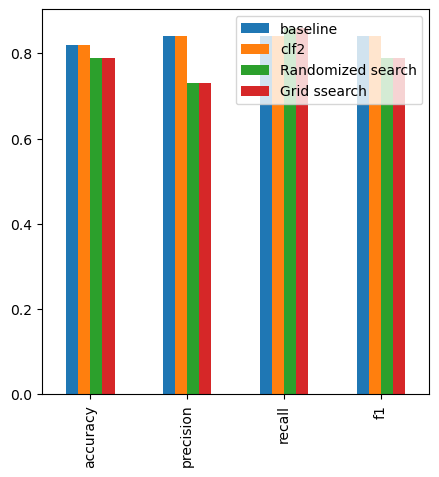

In [73]:
compare_metrics.plot.bar(figsize=(5,5));